<a href="https://colab.research.google.com/github/barbedorafael/Python_workshop_HGE/blob/main/python_M%C3%A1ximas_Empirica_Gumbel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 HIDROLOGIA

 Ingrid Petry
 10/08/2021

######################################################################

Ajuste da curva de probabilidade das precipitaçoes máximas anuais 

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [ ]:
# Adiciona o arquivo (formato, CSV, onde a primeira linha contém o nome das colunas)

from google.colab import files

uploaded = files.upload() # adicionar o arquivo P_max.csv na pasta do Drive

# Os dados são extraídos pelo nome da coluna, dessa forma, pode-se usar outro 
# de dados, basta que a primeira linha contenha o nome das colunas. 

In [ ]:
table = pd.read_csv('P_max.csv')

dados = pd.DataFrame(table)

print(dados.head())

    Ano  Pmax(mm/dia)
0  1961          68.0
1  1962          52.8
2  1963          66.8
3  1964          58.7
4  1965          98.8


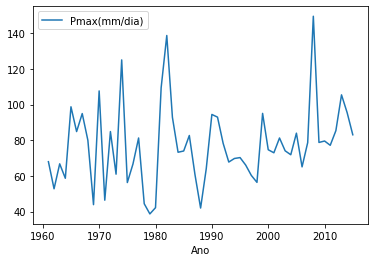

In [ ]:
dados.plot('Ano', 'Pmax(mm/dia)')
 

Text(0, 0.5, '(mm)')

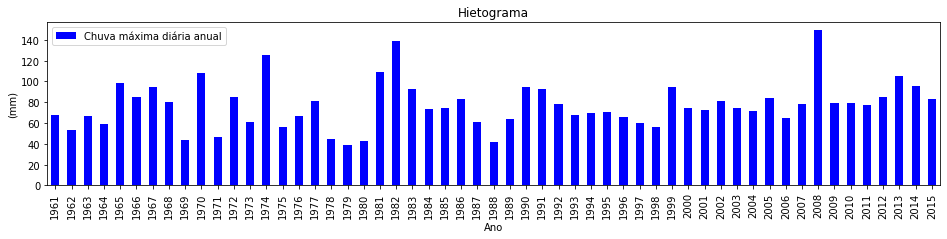

In [ ]:
dados.plot('Ano', 'Pmax(mm/dia)', style='.-', kind="bar", color='blue', label='Chuva máxima diária anual', figsize=(16,3))	

plt.title('Hietograma')

plt.xlabel('Ano')

plt.ylabel('(mm)')

In [ ]:
# Distribuição empírica

dados = dados.sort_values('Pmax(mm/dia)',ascending=False)   # organiza os dados de chuva em ordem decrescente 
dados = dados.reset_index(drop=True)              

nt = len(dados)                                             # número de intervalos de tempo 

dados['ordem'] = pd.Series(range(1,nt+1))                   # cria coluna com a ordem dos valores

dados['Prob_Weibul'] = dados['ordem'] / (nt+1)              # cria coluna com a probabilidade de excedência 

dados['TR'] = 1 / dados['Prob_Weibul']                      # cria coluna com a ordem dos valores de TR

print(dados.head())


    Ano  Pmax(mm/dia)  ordem  Prob_Weibul         TR
0  2008         149.6      1     0.017857  56.000000
1  1982         138.8      2     0.035714  28.000000
2  1974         125.1      3     0.053571  18.666667
3  1981         109.5      4     0.071429  14.000000
4  1970         107.7      5     0.089286  11.200000


In [ ]:
# Distribuição de máximas de Gumbel 

u = dados['Pmax(mm/dia)'].mean()      # média
s = dados['Pmax(mm/dia)'].std()       # desvio padrão
v = s**2                              # variança ( ** = ^ )

print('Média:', round(u,2))
print('Desvio Padrão:', round(s,2))
print('Variança:', round(v,2))


Média: 77.29
Desvio Padrão: 22.53
Variança: 507.73


In [ ]:
dados['Pmax_Gumbel'] = u-s*(0.45+0.7797*np.log(np.log(dados['TR']/(dados['TR']-1)))) 

print(dados.head())

    Ano  Pmax(mm/dia)  ordem  Prob_Weibul         TR  Pmax_Gumbel
0  2008         149.6      1     0.017857  56.000000   137.708772
1  1982         138.8      2     0.035714  28.000000   125.370448
2  1974         125.1      3     0.053571  18.666667   118.083903
3  1981         109.5      4     0.071429  14.000000   112.864105
4  1970         107.7      5     0.089286  11.200000   108.775512


Text(0.5, 1.0, 'Ajuste das precipitações máximas à distribuição Gumbel')

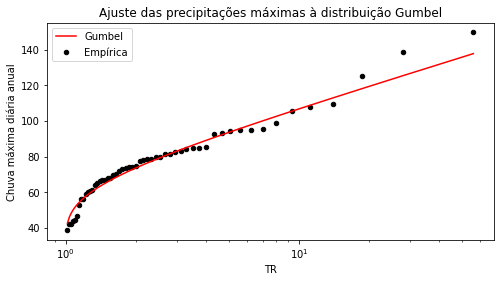

In [ ]:
# Plotando os gráficos 

ax = dados.plot('TR', 'Pmax_Gumbel', kind='line', color='red', label='Gumbel', figsize=(8,4))

dados.plot('TR', 'Pmax(mm/dia)', kind = 'scatter', color='k', label='Empírica', ax=ax)	

plt.xscale('log')

plt.xlabel('TR')

plt.ylabel('Chuva máxima diária anual')

plt.title('Ajuste das precipitações máximas à distribuição Gumbel')